# **Data Analysis Project: Air Quality Dataset**
Nama: Vicky Adzandra

Email: vikiadzandra@gmail.com

Id Dicoding: vicky1223


Business Questions


1. Station air quality during 2013-2017 based on PM2.5 pollutant parameters?
2. How is the air quality during certain time periods (daily), (monthly), and (annual)?
3. Mean air pollutant in 2013-2017?







# **Disclaimer**
The AirVisual series monitors AQI using PM2.5 measurements as the determinant of AQI readings because PM2.5 is widely available and is considered the most dangerous air pollutant that impacts human health

source: IQAir

# **Data Set Information**

This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.

# **Prepare all required libraries**

I saved the dataset on Google Drive so that the data can be accessed when analyzing the singing

In [40]:
import numpy as np
import pandas as pd

from google.colab import files
from google.colab import drive

drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns
import requests
import calendar

import plotly.graph_objects as go


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Wrangling

## Gathering Data

At this stage I collect air quality data to be processed to the analysis stage. There are 12 data sets from each station in China

In [41]:
#mengakses data melalui google drive
Aotizhongxin_df = pd.read_csv("/content/drive/My Drive/dicoding/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [42]:
#mengakses data melalui google drive

changping_df = pd.read_csv("/content/drive/My Drive/dicoding/PRSA_Data_Changping_20130301-20170228.csv")
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [43]:
#mengakses data melalui google drive

dingling_df = pd.read_csv("/content/drive/My Drive/dicoding/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [44]:
#mengakses data melalui google drive

dongsi_df = pd.read_csv("/content/drive/My Drive/dicoding/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [45]:
#mengakses data melalui google drive

guanyuan_df = pd.read_csv("/content/drive/My Drive/dicoding/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [46]:
#mengakses data melalui google drive

gucheng_df = pd.read_csv("/content/drive/My Drive/dicoding/PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [47]:
huairou_df = pd.read_csv("/content/drive/My Drive/dicoding/PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [48]:
#mengakses data melalui google drive

nongzhanguan_df = pd.read_csv("/content/drive/My Drive/dicoding/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [49]:
#mengakses data melalui google drive

shunyi_df = pd.read_csv("/content/drive/My Drive/dicoding/PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [50]:
#mengakses data melalui google drive

tiantan_df = pd.read_csv("/content/drive/My Drive/dicoding/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [51]:
#mengakses data melalui google drive
wanliu_df = pd.read_csv("/content/drive/My Drive/dicoding/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [52]:
#mengakses data melalui google drive

wanshouxigong_df = pd.read_csv('/content/drive/My Drive/dicoding/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [53]:
#meenggabungkan semua dataset
dfs = [Aotizhongxin_df,changping_df,dingling_df,dongsi_df,guanyuan_df,gucheng_df,
       huairou_df,nongzhanguan_df,shunyi_df,tiantan_df, wanliu_df,wanshouxigong_df]

In [54]:
#meenggabungkan semua dataset
air_df= pd.concat(dfs)

In [55]:
# to reset the index of a DataFrame
air_df.reset_index(drop = True, inplace = True)

## Assessing Data

In [56]:
# see the top 5 data
air_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [57]:
# look at the bottom 5 data
air_df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [58]:
# information dataset
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [59]:
air_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


## **Cleaning Data**

In [60]:
#drop column NO
air_df = air_df.drop(['No'], axis = 1)

In [61]:
#check duplicate data
print("Jumlah duplikasi: ",air_df.duplicated().sum())

Jumlah duplikasi:  0


In [62]:
#check for null data
air_df.isna().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [63]:
#check the percentage of null data
round(air_df.isnull().sum()/len(air_df.index), 4)*100

year       0.00
month      0.00
day        0.00
hour       0.00
PM2.5      2.08
PM10       1.53
SO2        2.14
NO2        2.88
CO         4.92
O3         3.16
TEMP       0.09
PRES       0.09
DEWP       0.10
RAIN       0.09
wd         0.43
WSPM       0.08
station    0.00
dtype: float64

In [64]:
#chek value wd
air_df.wd.value_counts()

NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: wd, dtype: int64

In [65]:
#Handle missing value

# Hitung nilai rata-rata
rata_rata_CO = air_df['CO'].mean()
rata_rata_NO2 = air_df['NO2'].mean()
rata_rata_O3 = air_df['O3'].mean()
rata_rata_PM2 = air_df['PM2.5'].mean()
rata_rata_SO2 = air_df['SO2'].mean()
rata_rata_PM10 = air_df['PM10'].mean()
rata_rata_DEWP = air_df['DEWP'].mean()
rata_rata_TEMP = air_df['TEMP'].mean()
rata_rata_RAIN = air_df['RAIN'].mean()
rata_rata_PRES = air_df['PRES'].mean()
rata_rata_WSPM = air_df['DEWP'].mean()
modus_wd = air_df['wd'].mode()[0]

# Ganti nilai-nilai NaN dengan modus
air_df['wd'].fillna(modus_wd, inplace=True)

# Ganti nilai kosong dengan nilai rata-rata
air_df['CO'].fillna(rata_rata_CO, inplace=True)
air_df['NO2'].fillna(rata_rata_NO2, inplace=True)
air_df['O3'].fillna(rata_rata_O3, inplace=True)
air_df['PM2.5'].fillna(rata_rata_PM2, inplace=True)
air_df['SO2'].fillna(rata_rata_SO2, inplace=True)
air_df['PM10'].fillna(rata_rata_PM10, inplace=True)
air_df['DEWP'].fillna(rata_rata_DEWP, inplace=True)
air_df['TEMP'].fillna(rata_rata_TEMP, inplace=True)
air_df['RAIN'].fillna(rata_rata_RAIN, inplace=True)
air_df['PRES'].fillna(rata_rata_PRES, inplace=True)
air_df['WSPM'].fillna(rata_rata_WSPM, inplace=True)

In [66]:
#chek data setelah dibersihkan
air_df.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [67]:
#see correlation between data
air_df.corr()

<ipython-input-67-f2b365f982db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  air_df.corr()


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,1.000000e+00,-2.020099e-01,-5.569082e-03,-2.115260e-15,-0.025605,-0.037475,-0.168632,-0.055590,0.007555,-0.023968,-0.151670,0.186519,-0.164686,0.000975,0.087801
month,-2.020099e-01,1.000000e+00,1.052232e-02,-1.905981e-16,0.010341,-0.025185,-0.211783,0.041690,0.045478,-0.101881,0.131213,-0.012784,0.265549,0.016052,-0.139995
day,-5.569082e-03,1.052232e-02,1.000000e+00,1.013388e-17,0.003391,0.025798,-0.005085,0.009725,-0.015321,0.002784,0.014385,0.021749,0.023061,-0.003697,-0.011425
hour,-2.115260e-15,-1.905981e-16,1.013388e-17,1.000000e+00,0.011606,0.051073,0.029626,-0.001538,-0.030604,0.277640,0.141924,-0.038351,-0.012211,0.012376,0.140455
PM2.5,-2.560478e-02,1.034053e-02,3.390902e-03,1.160579e-02,1.000000,0.879389,0.477582,0.658108,0.768664,-0.147204,-0.129715,0.018357,0.113499,-0.014156,-0.268971
PM10,-3.747533e-02,-2.518507e-02,2.579828e-02,5.107307e-02,0.879389,1.000000,0.458519,0.645448,0.686716,-0.109983,-0.095395,-0.017806,0.069767,-0.026360,-0.181797
SO2,-1.686324e-01,-2.117831e-01,-5.085191e-03,2.962574e-02,0.477582,0.458519,1.000000,0.491109,0.524707,-0.162283,-0.318067,0.220414,-0.263895,-0.040029,-0.107519
NO2,-5.558991e-02,4.169005e-02,9.725404e-03,-1.538160e-03,0.658108,0.645448,0.491109,1.000000,0.688207,-0.463523,-0.273864,0.171262,-0.031135,-0.043357,-0.393918
CO,7.554741e-03,4.547757e-02,-1.532101e-02,-3.060377e-02,0.768664,0.686716,0.524707,0.688207,1.000000,-0.305255,-0.317872,0.183004,-0.055615,-0.013008,-0.289970
O3,-2.396825e-02,-1.018805e-01,2.783523e-03,2.776401e-01,-0.147204,-0.109983,-0.162283,-0.463523,-0.305255,1.000000,0.585303,-0.438657,0.307678,0.023146,0.291528


# Exploratory Data Analysis (EDA)

## explore

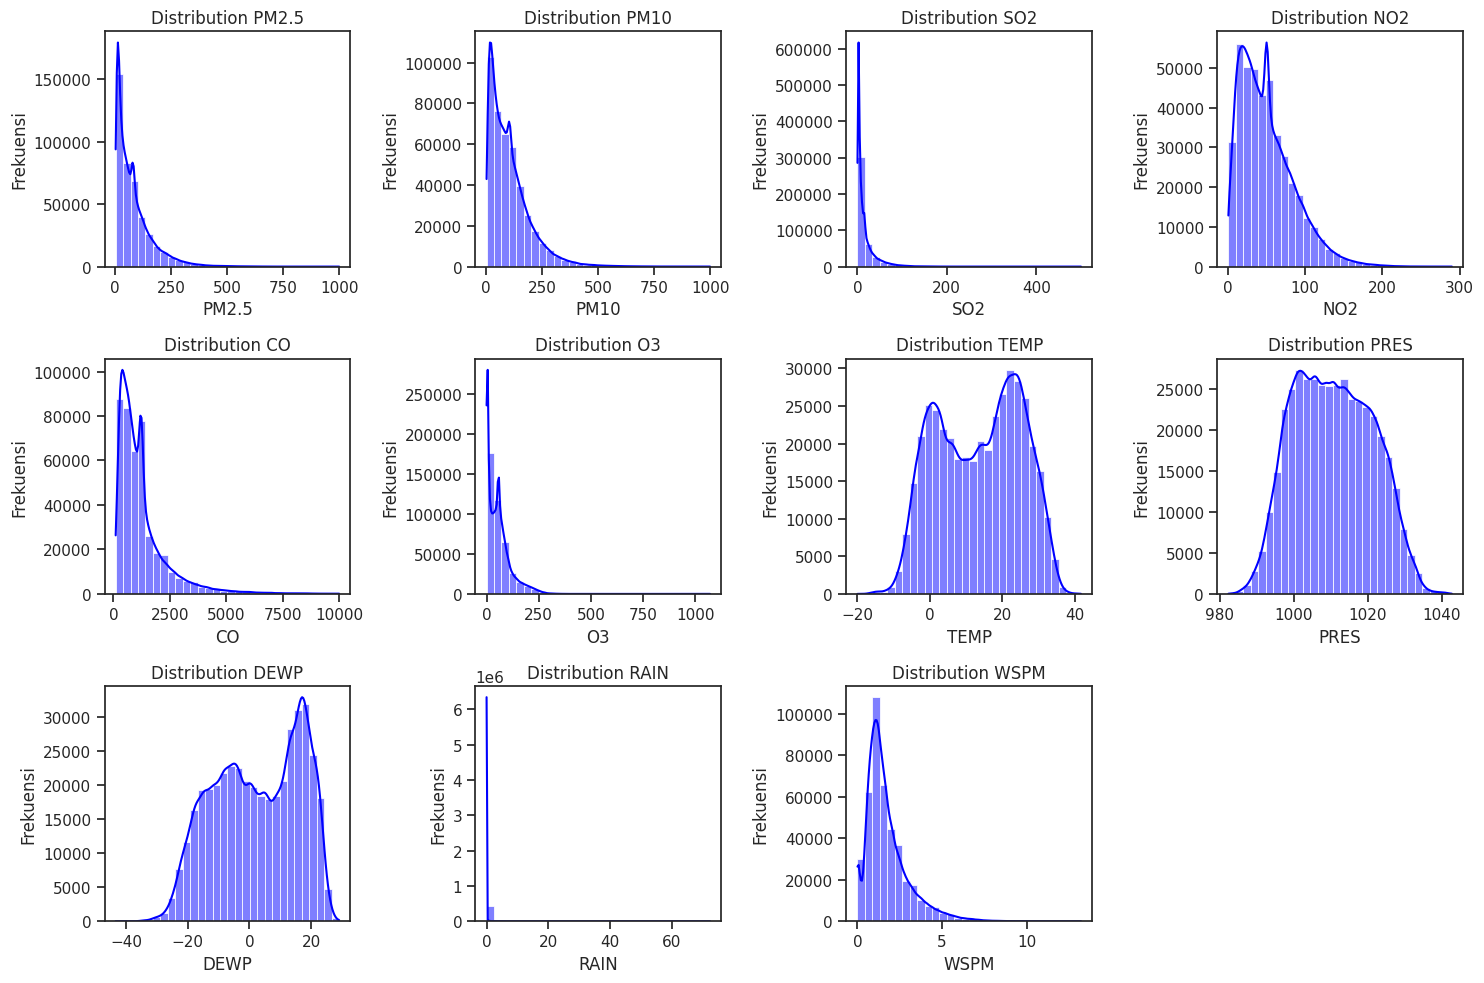

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kolom yang ingin ditampilkan
selected_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


# Menggunakan distplot untuk kolom numerik terpilih dengan tata letak 4 kolom
num_columns = len(selected_columns)
num_rows = (num_columns + 3) // 4  # Menghitung jumlah baris yang diperlukan

plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.histplot(air_df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

# Menyesuaikan tata letak subplots
plt.tight_layout()
plt.show()


Based on the visualization results above, you can see more data distribution in **RIGH SKEWED DISTRIBUTION**

<ipython-input-70-06abf5fc02e4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(air_df.corr(), cmap="YlGnBu",annot=True)


<bound method Figure.show of <Figure size 1200x800 with 2 Axes>>

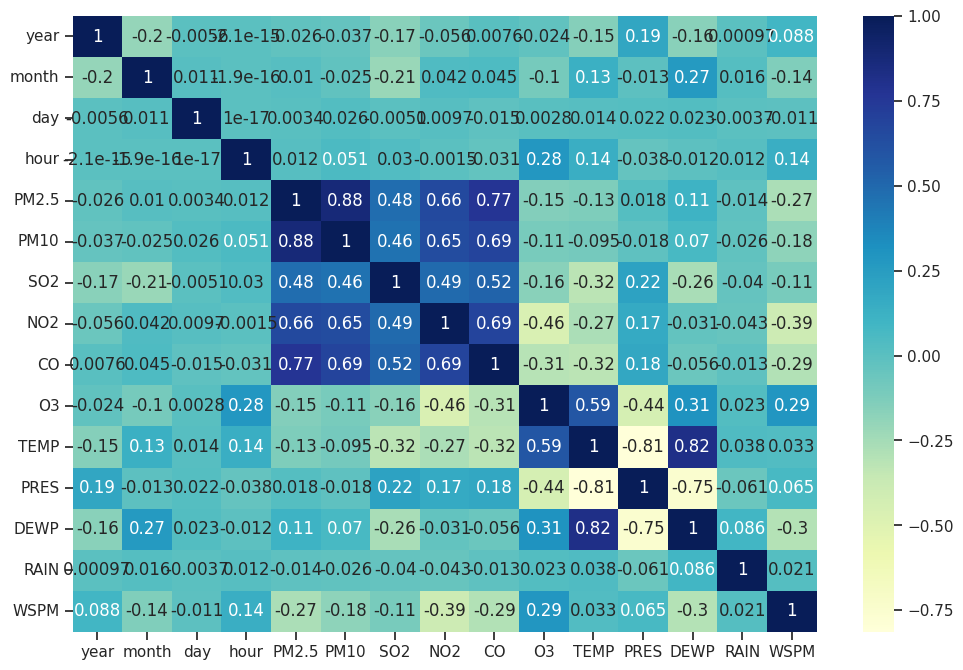

In [70]:
#check corelasi data menggunakan plot
plt = plt.figure(figsize=(12,8))
sns.heatmap(air_df.corr(), cmap="YlGnBu",annot=True)
plt.show

There are not many strong correlations between pollutants and TEMP, PRES, DEWP, RAIN, and WSPM

**TEMP and O3 have a correlation value of 0.59**

Temperature can affect the concentration of ozone in the air. Ozone is more stable at low temperatures, and its concentration can increase at low temperatures. Therefore, at lower temperatures, the concentration of ozone (O3) in the atmosphere tends to be higher


In [71]:
# Kolom-kolom yang mengandung data polutan udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari nilai yang paling umum untuk setiap polutan
most_common_pollutants = {}
for pollutant in pollutants:
    most_common_pollutant = air_df[pollutant].mode().values[0]
    most_common_pollutants[pollutant] = most_common_pollutant

# Menampilkan polutan udara paling umum dalam dataset
print("Polutan Udara Paling Umum:")
for pollutant, value in most_common_pollutants.items():
    print(f"{pollutant}: {value}")

Polutan Udara Paling Umum:
PM2.5: 3.0
PM10: 104.6026175483142
SO2: 2.0
NO2: 50.63858559263139
CO: 300.0
O3: 2.0


In [72]:
air_df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.730286
std,1.177198,3.448707,8.800102,6.922195,79.978679,91.066422,21.417257,34.618463,1131.283304,55.760484,11.430729,10.469162,13.787240,0.820624,1.246090
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [73]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    420768 non-null  float64
 5   PM10     420768 non-null  float64
 6   SO2      420768 non-null  float64
 7   NO2      420768 non-null  float64
 8   CO       420768 non-null  float64
 9   O3       420768 non-null  float64
 10  TEMP     420768 non-null  float64
 11  PRES     420768 non-null  float64
 12  DEWP     420768 non-null  float64
 13  RAIN     420768 non-null  float64
 14  wd       420768 non-null  object 
 15  WSPM     420768 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


In [74]:
air_df.dtypes

year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

# Visualization & Explanatory Analysis

## Question 1
**Station air quality during 2013-2017 based on PM2.5 pollutant parameters?**

In [75]:
import numpy as np
import pandas as pd

from google.colab import files
from google.colab import drive

drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns
import requests
import calendar

import plotly.graph_objects as go

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1000x500 with 0 Axes>

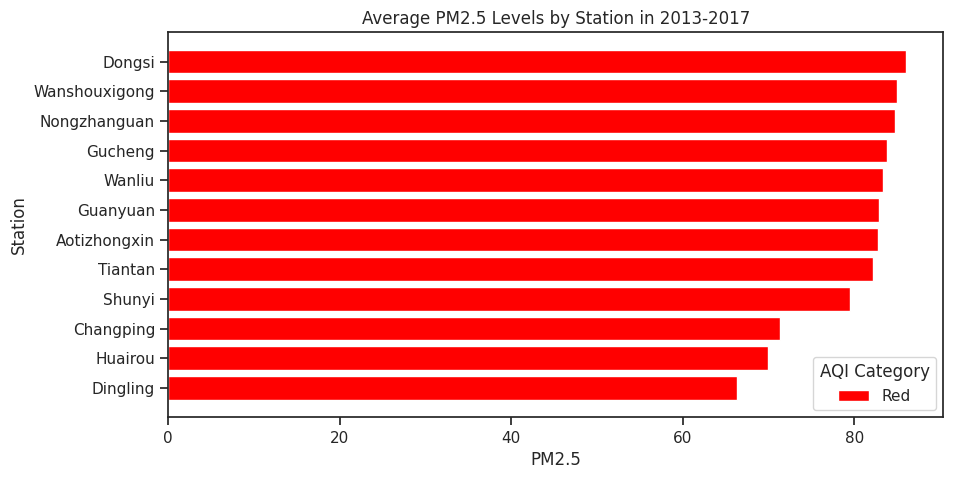

          station      PM2.5 AQI Category
2        Dingling  66.296172          Red
6         Huairou  69.902696          Red
1       Changping  71.291647          Red
8          Shunyi  79.499461          Red
9         Tiantan  82.119124          Red
0    Aotizhongxin  82.694993          Red
4        Guanyuan  82.878210          Red
10         Wanliu  83.335700          Red
5         Gucheng  83.777314          Red
7    Nongzhanguan  84.748126          Red
11  Wanshouxigong  84.920309          Red
3          Dongsi  86.057386          Red


In [103]:
# Kelompokkan berdasarkan stasiun dan hitung rata-rata tingkat PM2.5
df_year_mean = air_df.groupby('station')['PM2.5'].mean().reset_index()

# Buat bar chart dengan kategori AQI
plt.figure(figsize=(10,5))
sorted_df = df_year_mean.sort_values(by='PM2.5', ascending=True)  # Urutkan DataFrame berdasarkan PM2.5

# Tambahkan kategori AQI
aqi_categories = []
for pm25 in sorted_df['PM2.5']:
    if 0 <= pm25 <= 12.0:
        aqi_categories.append("Hijau")
    elif 12.1 <= pm25 <= 35.4:
        aqi_categories.append("Kuning")
    elif 35.5 <= pm25 <= 55.5:
        aqi_categories.append("Oranye")
    elif 55.6 <= pm25 <= 150.4:
        aqi_categories.append("Merah")
    elif 150.5 <= pm25 <= 250.4:
        aqi_categories.append("Ungu")
    else:
        aqi_categories.append("Merah tua")

sorted_df['AQI Category'] = aqi_categories

# ...
# Buat bar chart dengan kategori AQI
plt.figure(figsize=(10,5))
sorted_df = df_year_mean.sort_values(by='PM2.5', ascending=True)

# Tambahkan kategori AQI
aqi_categories = []
for pm25 in sorted_df['PM2.5']:
    if 0 <= pm25 <= 12.0:
        aqi_categories.append("Green")
    elif 12.1 <= pm25 <= 35.4:
        aqi_categories.append("Yellow")
    elif 35.5 <= pm25 <= 55.5:
        aqi_categories.append("Orange")
    elif 55.6 <= pm25 <= 150.4:
        aqi_categories.append("Red")
    elif 150.5 <= pm25 <= 250.4:
        aqi_categories.append("Purple")
    else:
        aqi_categories.append("Crimson")

sorted_df['AQI Category'] = aqi_categories

# Daftar warna yang sesuai dengan kategori AQI
color_dict = {
    'Green': 'green',
    'Yellow': 'yellow',
    'Orange': 'orange',
    'Red': 'red',
    'Purple': 'purple',
    'Crimson': 'darkred'
}

# Buat grafik batang dengan kategori AQI
unique_aqi_categories = sorted_df['AQI Category'].unique()

bars = []
for aqi in unique_aqi_categories:
    aqi_df = sorted_df[sorted_df['AQI Category'] == aqi]
    bars.append(plt.barh(aqi_df['station'], aqi_df['PM2.5'], color=color_dict[aqi], label=aqi))

plt.xlabel('PM2.5')
plt.ylabel('Station')
plt.title('Average PM2.5 Levels by Station in 2013-2017')

# Menampilkan legenda
plt.legend(handles=bars, title='AQI Category')

plt.show()

# Print rata-rata PM2.5 beserta kategori AQI
mean_PM25_by_station = sorted_df[['station', 'PM2.5', 'AQI Category']]
print(mean_PM25_by_station)




Based on the data above which is guided by AQI (Air Quality Index) by IQAir

**Dongsi Station** is the station with **the highest PM2.5** pollutant level, namely **86.06**, which is included in Unhealthy air quality.

**Dingling station** with the **lowest PM2.5** pollutant level, namely 66.30 in 2013-2017

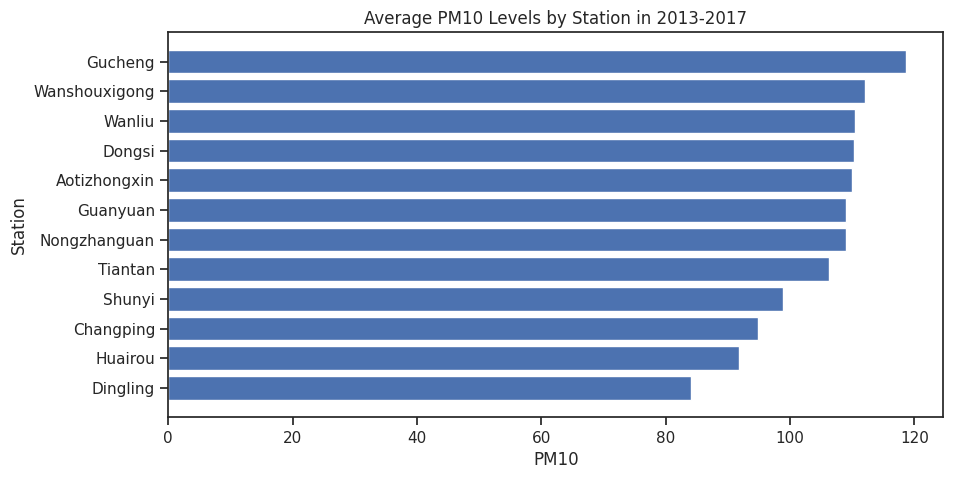

station
Gucheng          118.71
Wanshouxigong    112.12
Wanliu           110.42
Dongsi           110.25
Aotizhongxin     109.95
Guanyuan         108.97
Nongzhanguan     108.94
Tiantan          106.33
Shunyi            98.83
Changping         94.82
Huairou           91.77
Dingling          84.13
Name: PM10, dtype: float64

In [77]:
# Kelompokkan berdasarkan stasiun dan hitung rata-rata tingkat PM10
df_year_mean = air_df.groupby('station')['PM10'].mean().reset_index()

# Buat bar chart
plt.figure(figsize=(10,5))
sorted_df = df_year_mean.sort_values(by='PM10', ascending=True)  # Urutkan DataFrame berdasarkan PM10
plt.barh(sorted_df['station'], sorted_df['PM10'])
plt.xlabel('PM10')
plt.ylabel('Station')
plt.title('Average PM10 Levels by Station in 2013-2017')

plt.show()

# print("Rata-Rata Polutan PM10 selama 2013-2017")
mean_PM10_by_station = air_df.groupby('station')['PM10'].mean()
mean_PM10_by_station.round(2).head(15).sort_values(ascending= False)

Station **Gucheng** merupakan station dengan tingkat polutan **PM10 tertinggi** yaitu **118.71** tahun 2013-2017

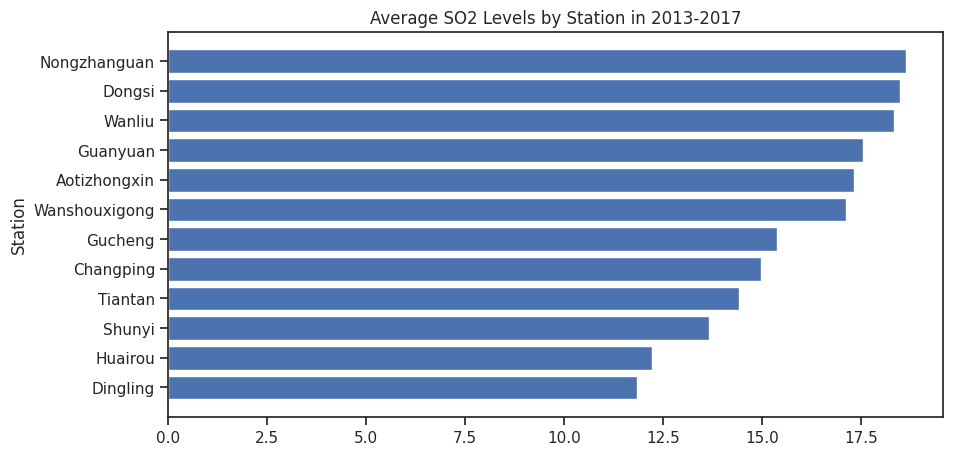

station
Nongzhanguan     18.65
Dongsi           18.48
Wanliu           18.33
Guanyuan         17.57
Aotizhongxin     17.33
Wanshouxigong    17.12
Gucheng          15.37
Changping        14.97
Tiantan          14.41
Shunyi           13.66
Huairou          12.23
Dingling         11.83
Name: SO2, dtype: float64

In [78]:
# Kelompokkan berdasarkan stasiun dan hitung rata-rata tingkat SO2
df_year_mean = air_df.groupby('station')['SO2'].mean().reset_index()

# Buat bar chart
plt.figure(figsize=(10,5))
sorted_df = df_year_mean.sort_values(by='SO2', ascending=True)  # Urutkan DataFrame berdasarkan SO2
plt.barh(sorted_df['station'], sorted_df['SO2'])
plt.ylabel('Station')
plt.title('Average SO2 Levels by Station in 2013-2017')

plt.show()

# print("Rata-Rata Polutan SO2 selama 2013-2017")
mean_SO2_by_station = air_df.groupby('station')['SO2'].mean()
mean_SO2_by_station.round(2).head(15).sort_values(ascending= False)

**Nongzhanguan** Station is the station with the highest **SO2** pollutant level, namely **18.65** in 2013-2017

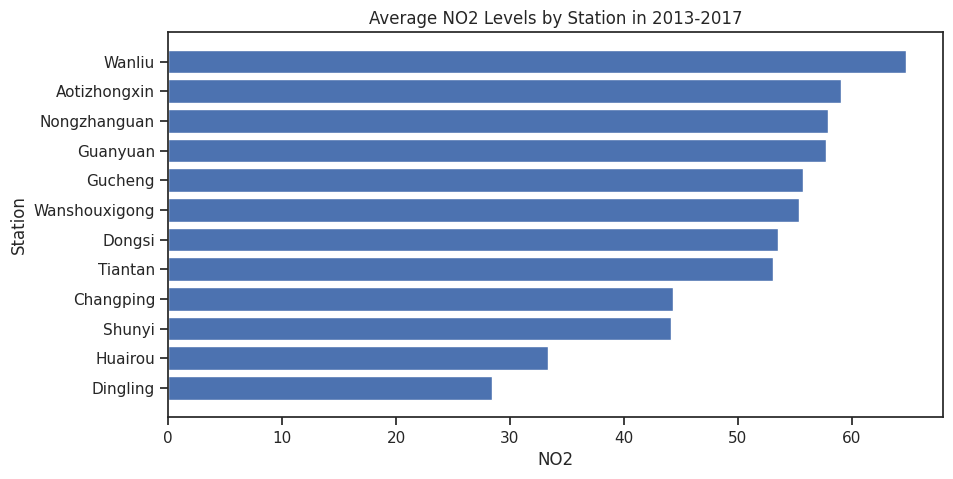

station
Wanliu           64.81
Aotizhongxin     59.05
Nongzhanguan     57.95
Guanyuan         57.77
Gucheng          55.77
Wanshouxigong    55.42
Dongsi           53.56
Tiantan          53.11
Changping        44.30
Shunyi           44.17
Huairou          33.35
Dingling         28.40
Name: NO2, dtype: float64

In [79]:
# Kelompokkan berdasarkan stasiun dan hitung rata-rata tingkat NO2
df_year_mean = air_df.groupby('station')['NO2'].mean().reset_index()

# Buat bar chart
plt.figure(figsize=(10,5))
sorted_df = df_year_mean.sort_values(by='NO2', ascending=True)  # Urutkan DataFrame berdasarkan NO2
plt.barh(sorted_df['station'], sorted_df['NO2'])
plt.xlabel('NO2')
plt.ylabel('Station')
plt.title('Average NO2 Levels by Station in 2013-2017')

plt.show()

# print("Rata-Rata Polutan NO2 selama 2013-2017")
mean_NO2_by_station = air_df.groupby('station')['NO2'].mean()
mean_NO2_by_station.round(2).head(15).sort_values(ascending= False)

**Wanliu** Station is the station with the highest **NO2** pollutant level, namely **64.81** in 2013-2017

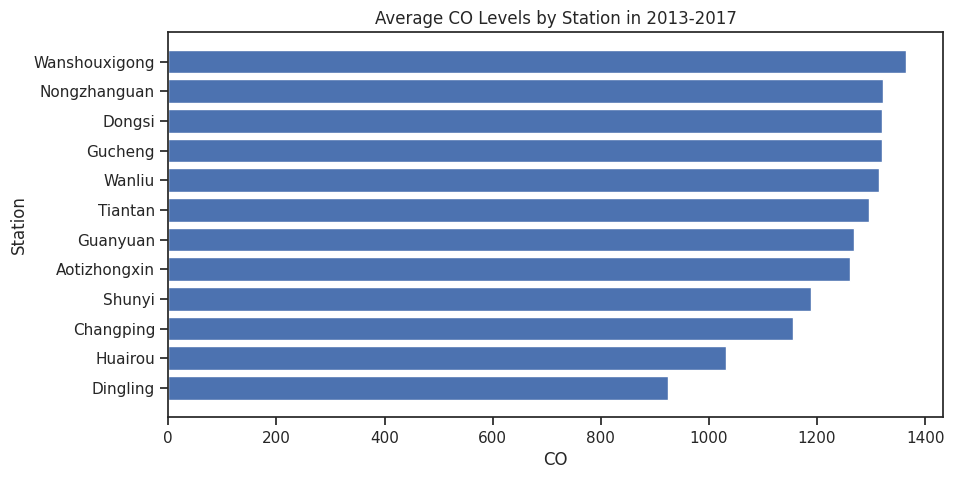

station
Wanshouxigong    1365.23
Nongzhanguan     1321.13
Dongsi           1321.02
Gucheng          1320.25
Wanliu           1314.78
Tiantan          1296.13
Guanyuan         1269.27
Aotizhongxin     1261.32
Shunyi           1189.78
Changping        1155.70
Huairou          1031.00
Dingling          923.59
Name: CO, dtype: float64

In [80]:
# Kelompokkan berdasarkan stasiun dan hitung rata-rata tingkat CO
df_year_mean = air_df.groupby('station')['CO'].mean().reset_index()

# Buat bar chart
plt.figure(figsize=(10,5))
sorted_df = df_year_mean.sort_values(by='CO', ascending=True)  # Urutkan DataFrame berdasarkan CO
plt.barh(sorted_df['station'], sorted_df['CO'])
plt.xlabel('CO')
plt.ylabel('Station')
plt.title('Average CO Levels by Station in 2013-2017')

plt.show()

# print("Rata-Rata Polutan CO selama 2013-2017")
mean_CO_by_station = air_df.groupby('station')['CO'].mean()
mean_CO_by_station.round(2).head(15).sort_values(ascending= False)

**Wanshouxigong** Station is the station with the highest **CO** pollutant level, namely **1370.40** in 2013-2017

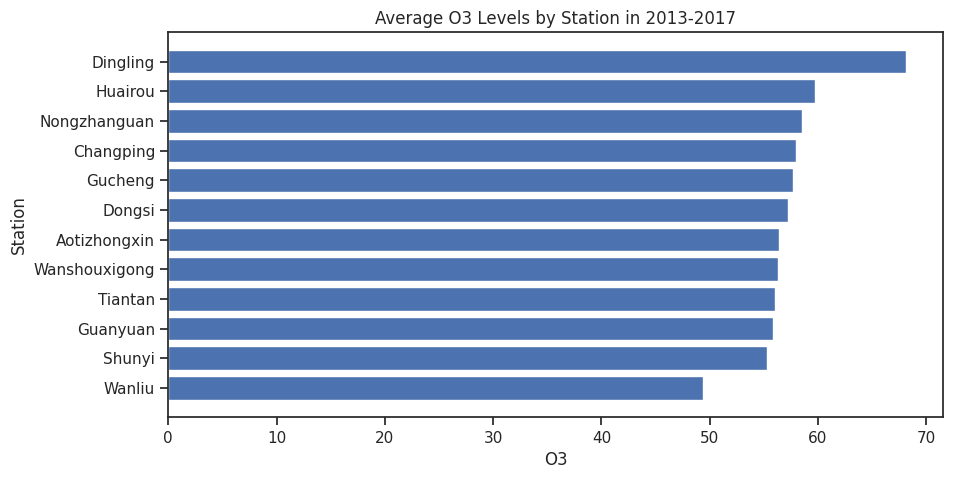

station
Dingling         68.16
Huairou          59.74
Nongzhanguan     58.52
Changping        57.93
Gucheng          57.69
Dongsi           57.21
Aotizhongxin     56.40
Wanshouxigong    56.27
Tiantan          56.02
Guanyuan         55.85
Shunyi           55.29
Wanliu           49.38
Name: O3, dtype: float64

In [81]:
# Kelompokkan berdasarkan stasiun dan hitung rata-rata tingkat O3
df_year_mean = air_df.groupby('station')['O3'].mean().reset_index()

# Buat bar chart
plt.figure(figsize=(10,5))
sorted_df = df_year_mean.sort_values(by='O3', ascending=True)  # Urutkan DataFrame berdasarkan O3
plt.barh(sorted_df['station'], sorted_df['O3'])
plt.xlabel('O3')
plt.ylabel('Station')
plt.title('Average O3 Levels by Station in 2013-2017')

plt.show()

# print("Rata-Rata Polutan O3 selama 2013-2017")
mean_O3_by_station = air_df.groupby('station')['O3'].mean()
mean_O3_by_station.round(2).head(15).sort_values(ascending= False)

Station **Dingling** is the station with the highest **O3** pollutant level, namely **68.55** in 2013-2017

## Question 2
**How is the air quality during certain time periods (daily), (monthly), and (annual)**

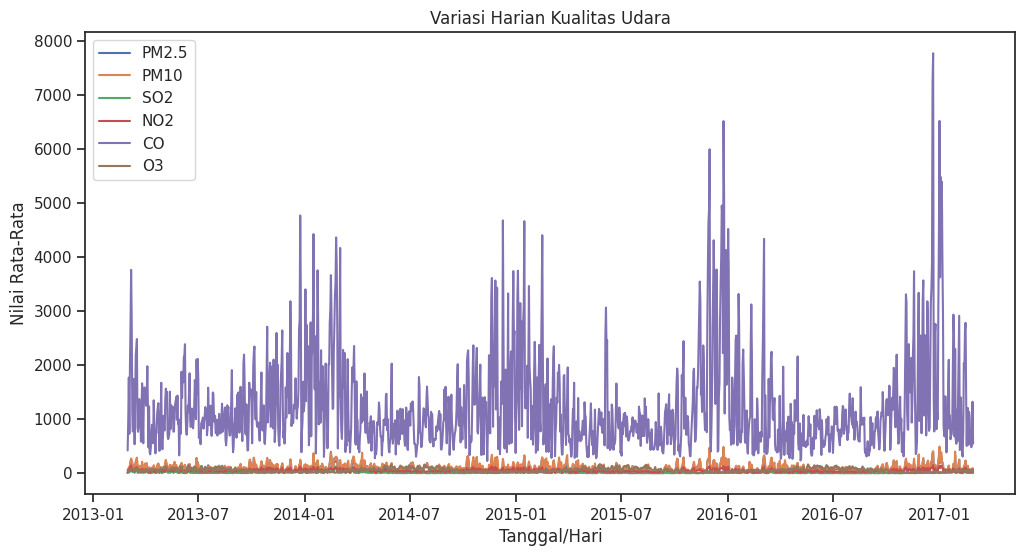

In [82]:
# Konversi kolom 'year', 'month', 'day' menjadi tipe data datetime
air_df['date'] = pd.to_datetime(air_df[['year', 'month', 'day']])

# Agregasi data harian
daily_data = air_df.groupby('date').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

# Visualisasi data harian
plt.figure(figsize=(12, 6))
for column in daily_data.columns:
    plt.plot(daily_data.index, daily_data[column], label=column)

plt.title('Variasi Harian Kualitas Udara')
plt.xlabel('Tanggal/Hari')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()

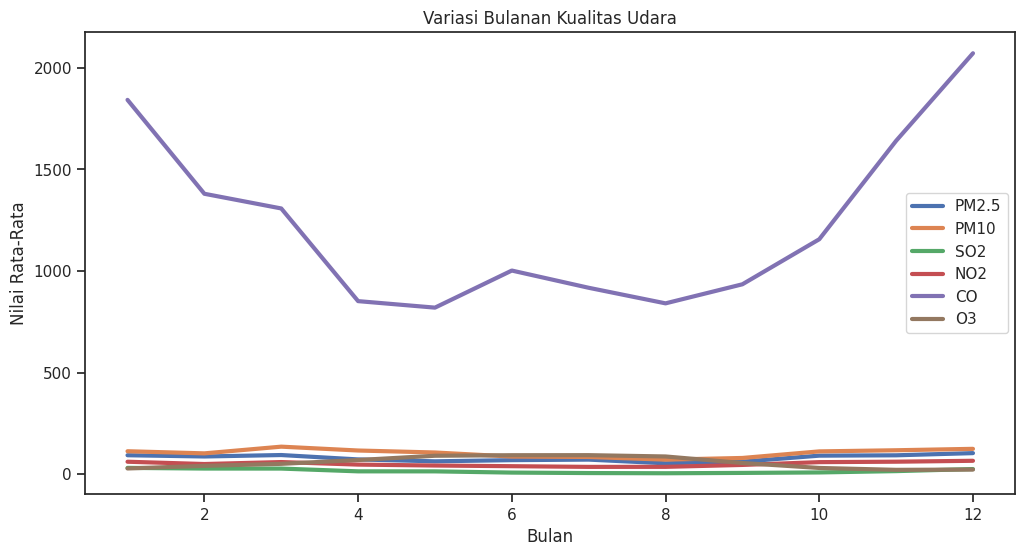

In [83]:
# Agregasi data bulanan
annual_data = air_df.groupby('month').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

# Visualisasi data bulanan
plt.figure(figsize=(12, 6))
for column in annual_data.columns:
    plt.plot(annual_data.index, annual_data[column], label=column,linewidth=3)

plt.title('Variasi Bulanan Kualitas Udara')
plt.xlabel('Bulan')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()

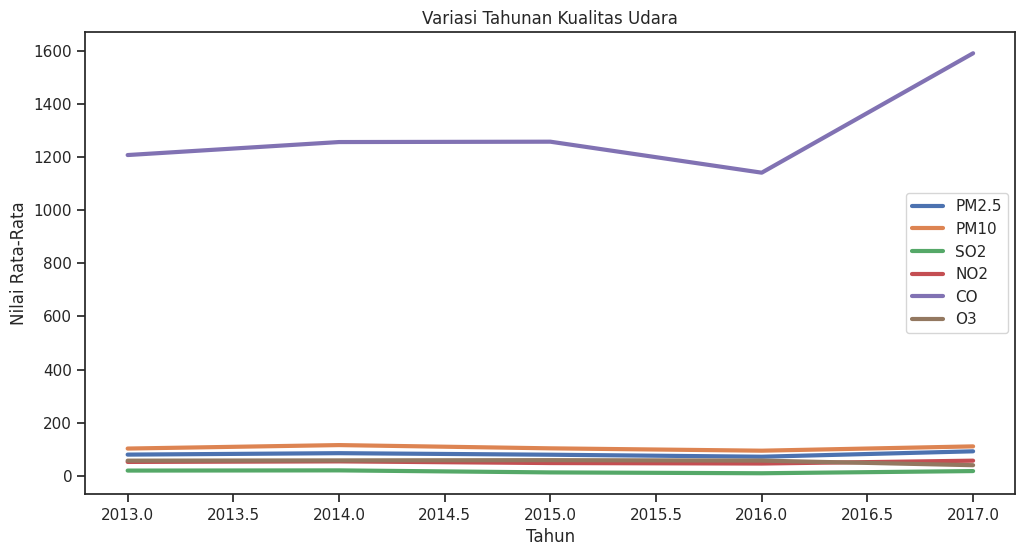

In [84]:
# Agregasi data tahunan
annual_data = air_df.groupby('year').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

# Visualisasi data tahunan
plt.figure(figsize=(12, 6))
for column in annual_data.columns:
    plt.plot(annual_data.index, annual_data[column], label=column, linewidth=3)  # Tambahkan parameter linewidth di sini

plt.title('Variasi Tahunan Kualitas Udara')
plt.xlabel('Tahun')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()

Based on the graph of daily, monthly and annual variations in air quality, **CO pollutant** is ranked **first** in pollutant composition and ranked highest in **2017**



In [85]:
#Pivot table to see the average air pollutant at each Tagun station 2013 - 2017
air_df.groupby(by=[ "station","year"]).agg({
    "PM2.5": "mean",
    "PM10" : "mean",
    "SO2" :"mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"
}).round()

PM2.5   PM10   SO2   NO2      CO    O3
station       year                                        
Aotizhongxin  2013   82.0  113.0  23.0  63.0  1184.0  50.0
              2014   90.0  121.0  21.0  63.0  1192.0  50.0
              2015   82.0  112.0  14.0  61.0  1395.0  64.0
              2016   74.0   95.0  11.0  49.0  1196.0  62.0
              2017   95.0  107.0  21.0  66.0  1668.0  48.0
Changping     2013   73.0   91.0  19.0  41.0  1062.0  61.0
              2014   79.0  107.0  21.0  46.0  1198.0  63.0
              2015   70.0   94.0  12.0  43.0  1164.0  58.0
              2016   62.0   87.0   8.0  46.0  1125.0  54.0
              2017   80.0   94.0  16.0  51.0  1526.0  33.0
Dingling      2013   65.0   79.0  14.0  32.0   913.0  65.0
              2014   74.0   91.0  15.0  28.0   887.0  72.0
              2015   65.0   86.0  11.0  27.0   971.0  71.0
              2016   61.0   81.0   7.0  26.0   884.0  67.0
              2017   68.0   79.0  13.0  35.0  1156.0  54.0
Dongsi        2013   87.0  105.0  24.0  58.0  1299.0  63.0
              2014   87.0  117.0  24.0  55.0  1367.0  57.0
              2015   87.0  112.0  15.0  50.0  1335.0  56.0
              2016   80.0  103.0  12.0  51.0  1239.0  56.0
              2017  103.0  131.0  20.0  58.0  1573.0  40.0
Guanyuan      2013   82.0  108.0  22.0  58.0  1191.0  58.0
              2014   88.0  116.0  23.0  64.0  1350.0  55.0
              2015   82.0  106.0  14.0  55.0  1314.0  57.0
              2016   77.0  105.0  12.0  54.0  1174.0  55.0
              2017   93.0  117.0  21.0  65.0  1488.0  46.0
Gucheng       2013   82.0  113.0  18.0  61.0  1287.0  56.0
              2014   89.0  133.0  20.0  62.0  1419.0  59.0
              2015   84.0  116.0  13.0  50.0  1324.0  61.0
              2016   77.0  111.0  10.0  50.0  1172.0  60.0
              2017  101.0  126.0  21.0  62.0  1780.0  29.0
Huairou       2013   69.0   95.0  17.0  38.0  1026.0  61.0
              2014   77.0  100.0  18.0  38.0  1072.0  67.0
              2015   71.0   90.0   9.0  29.0  1044.0  60.0
              2016   61.0   83.0   7.0  29.0   935.0  53.0
              2017   74.0   92.0  10.0  39.0  1317.0  47.0
Nongzhanguan  2013   84.0  104.0  23.0  60.0  1299.0  56.0
              2014   90.0  125.0  24.0  62.0  1334.0  60.0
              2015   86.0  107.0  16.0  58.0  1376.0  61.0
              2016   76.0   97.0  12.0  52.0  1212.0  60.0
              2017  101.0  120.0  21.0  58.0  1695.0  37.0
Shunyi        2013   77.0   95.0  16.0  42.0  1237.0  57.0
              2014   84.0  111.0  17.0  46.0  1168.0  58.0
              2015   81.0  100.0  11.0  43.0  1182.0  52.0
              2016   72.0   88.0  10.0  43.0  1089.0  56.0
              2017   95.0  107.0  21.0  56.0  1750.0  42.0
Tiantan       2013   83.0  108.0  18.0  53.0  1311.0  54.0
              2014   86.0  114.0  19.0  55.0  1311.0  57.0
              2015   83.0  103.0  12.0  52.0  1299.0  60.0
              2016   74.0   97.0   9.0  50.0  1199.0  55.0
              2017   98.0  125.0  14.0  64.0  1710.0  36.0
Wanliu        2013   92.0  112.0  24.0  68.0  1254.0  50.0
              2014   89.0  130.0  25.0  75.0  1364.0  44.0
              2015   81.0  107.0  15.0  58.0  1330.0  52.0
              2016   72.0   93.0  11.0  58.0  1233.0  54.0
              2017   94.0  111.0  20.0  69.0  1738.0  36.0
Wanshouxigong 2013   84.0  111.0  22.0  56.0  1422.0  55.0
              2014   89.0  126.0  22.0  61.0  1411.0  57.0
              2015   85.0  111.0  14.0  53.0  1354.0  59.0
              2016   79.0   99.0  11.0  51.0  1232.0  57.0
              2017  107.0  122.0  19.0  64.0  1681.0  35.0

In [86]:

#Pivot table untuk melihat rata rata polutan udara tahun 2013 - 2017
air_df.groupby(by=["year"]).agg({
    "PM2.5": "mean",
    "PM10" : "mean",
    "SO2" :"mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"
}).round()

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,80.0,103.0,20.0,52.0,1207.0,57.0
2014,85.0,116.0,21.0,55.0,1256.0,58.0
2015,80.0,104.0,13.0,48.0,1257.0,59.0
2016,72.0,95.0,10.0,46.0,1141.0,57.0
2017,92.0,111.0,18.0,57.0,1590.0,40.0


In [87]:
# Mendefinisikan fungsi untuk mengubah angka bulan menjadi nama bulan
def get_month_name(month):
    return calendar.month_name[month]


#Pivot table untuk melihat rata rata polutan udara BULANAN
result_month_df  = air_df.groupby(by=["month"]).agg({
    "PM2.5": "mean",
    "PM10" : "mean",
    "SO2" :"mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"
}).round()



# Mengubah indeks dari angka bulan menjadi nama bulan
result_month_df.index = result_month_df.index.map(get_month_name)
result_month_df



,PM2.5,PM10,SO2,NO2,CO,O3
month,,,,,,
January,94.0,113.0,31.0,62.0,1842.0,28.0
February,87.0,103.0,28.0,50.0,1380.0,41.0
March,94.0,136.0,28.0,60.0,1308.0,51.0
April,73.0,117.0,14.0,47.0,852.0,70.0
May,64.0,107.0,14.0,43.0,820.0,91.0
June,69.0,87.0,8.0,40.0,1002.0,94.0
July,72.0,85.0,6.0,36.0,918.0,94.0
August,54.0,72.0,5.0,36.0,841.0,87.0
September,62.0,80.0,7.0,46.0,935.0,55.0


In [88]:
#Pivot table untuk melihat rata rata polutan udara berdasarkan station
air_df.groupby(by=["station"]).agg({
    "PM2.5": "mean",
    "PM10" : "mean",
    "SO2" :"mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"
}).round()

,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,83.0,110.0,17.0,59.0,1261.0,56.0
Changping,71.0,95.0,15.0,44.0,1156.0,58.0
Dingling,66.0,84.0,12.0,28.0,924.0,68.0
Dongsi,86.0,110.0,18.0,54.0,1321.0,57.0
Guanyuan,83.0,109.0,18.0,58.0,1269.0,56.0
Gucheng,84.0,119.0,15.0,56.0,1320.0,58.0
Huairou,70.0,92.0,12.0,33.0,1031.0,60.0
Nongzhanguan,85.0,109.0,19.0,58.0,1321.0,59.0
Shunyi,79.0,99.0,14.0,44.0,1190.0,55.0


In [89]:

# Membuat kolom "day_of_week" yang akan mewakili hari dalam seminggu
air_df['day_of_week'] = air_df['day'] % 7

# Dataframe sekarang memiliki kolom "day_of_week" yang merepresentasikan hari dalam seminggu (0-6)

# Mendefinisikan fungsi untuk mengubah angka hari menjadi nama hari
def get_day_name(day):
    return calendar.day_name[day]

# Melakukan pengelompokan dan menghitung rata-rata polutan HARIAN
result_day_df = air_df.groupby(by=["day_of_week"]).agg({
    "PM2.5": "mean",
    "PM10" : "mean",
    "SO2" :"mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"
}).round()

# Mengubah indeks dari angka hari menjadi nama hari
result_day_df.index = result_day_df.index.map(get_day_name)

# Mencetak hasil pivot table
result_day_df

,PM2.5,PM10,SO2,NO2,CO,O3
day_of_week,,,,,,
Monday,83.0,107.0,16.0,51.0,1260.0,57.0
Tuesday,84.0,111.0,17.0,52.0,1267.0,56.0
Wednesday,79.0,105.0,16.0,51.0,1218.0,58.0
Thursday,79.0,106.0,16.0,51.0,1235.0,57.0
Friday,81.0,104.0,15.0,51.0,1264.0,57.0
Saturday,76.0,100.0,14.0,49.0,1173.0,59.0
Sunday,76.0,98.0,15.0,49.0,1192.0,58.0


In [90]:
#Pivot table untuk melihat rata rata polutan udara di steiap station tagun 2013 - 2017 berdasarkan jam
air_df.groupby(by=["hour"]).agg({
    "PM2.5": "mean",
    "PM10" : "mean",
    "SO2" :"mean",
    "NO2" : "mean",
    "CO" : "mean",
    "O3" : "mean"
}).round()

,PM2.5,PM10,SO2,NO2,CO,O3
hour,,,,,,
0,87.0,115.0,15.0,58.0,1366.0,42.0
1,86.0,111.0,15.0,56.0,1369.0,39.0
2,84.0,107.0,15.0,53.0,1317.0,35.0
3,82.0,102.0,14.0,52.0,1274.0,34.0
4,79.0,98.0,13.0,52.0,1237.0,33.0
5,76.0,94.0,13.0,51.0,1249.0,29.0
6,74.0,92.0,13.0,51.0,1264.0,28.0
7,73.0,94.0,13.0,53.0,1290.0,26.0
8,75.0,99.0,15.0,54.0,1336.0,28.0


## Question 3
**Mean air pollutant in 2013-2017?**

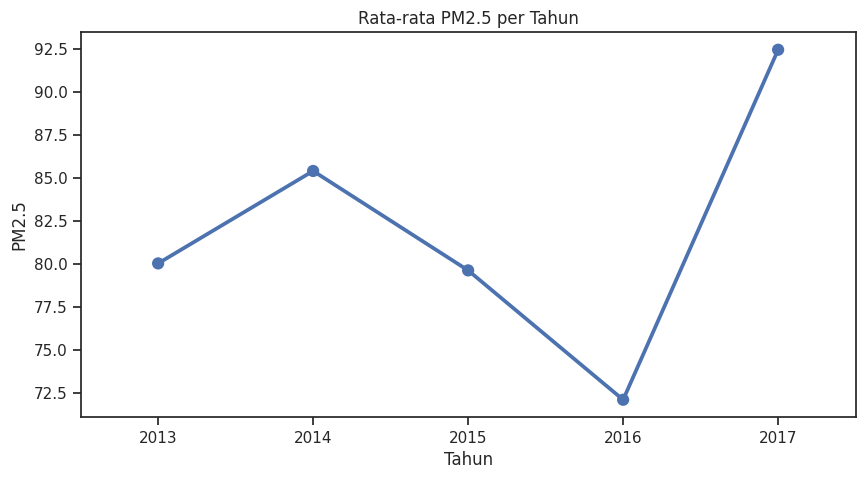

In [91]:
df = air_df[['PM2.5', 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)

# Membuat plot PM2.5
f, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(x='year', y='PM2.5', data=df)

# Menambahkan judul dan label sumbu
plt.title('Rata-rata PM2.5 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('PM2.5')

# Menampilkan plot
plt.show()

Berdasarkan line chart diatas polutan **PM2.5 tertinggi** berada pada tahun **2017**

Text(0, 0.5, 'PM10')

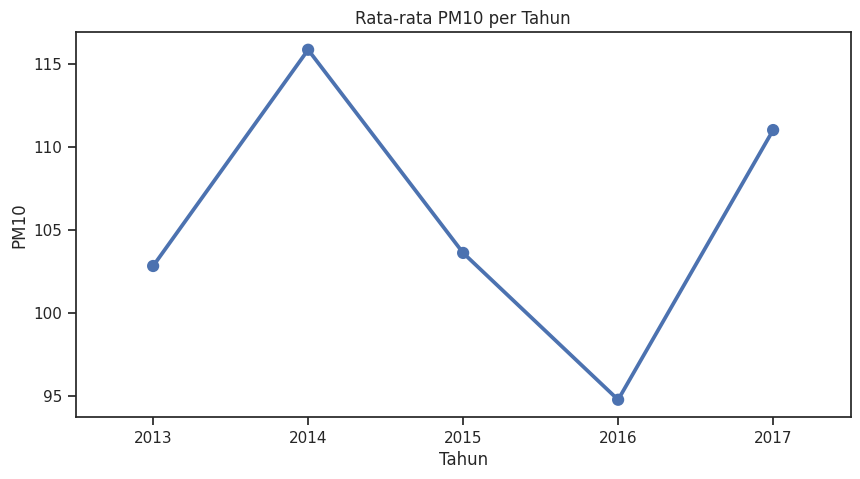

In [92]:
df = air_df[['PM10', 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)

# Membuat plot PM10
f, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(x='year', y='PM10', data=df)

# Menambahkan judul dan label sumbu
plt.title('Rata-rata PM10 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('PM10')

# Menampilkan plot

Berdasarkan line chart diatas polutan **PM10 tertinggi** berada pada tahun **2014**

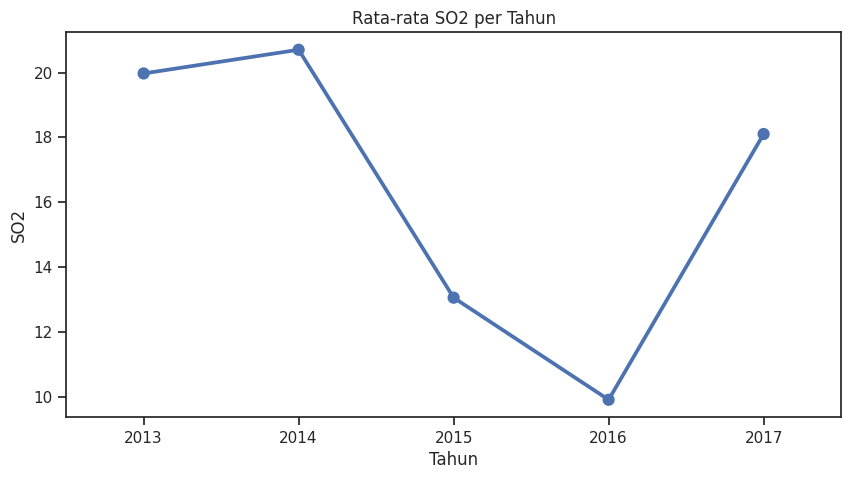

In [93]:
# Data dan pengolahan data
df = air_df[['SO2', 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)

# Membuat plot SO2
f, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(x='year', y='SO2', data=df)

# Menambahkan judul dan label sumbu
plt.title('Rata-rata SO2 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('SO2')

# Menampilkan plot
plt.show()

Berdasarkan line chart diatas polutan **SO2 tertinggi** berada pada tahun **2014**

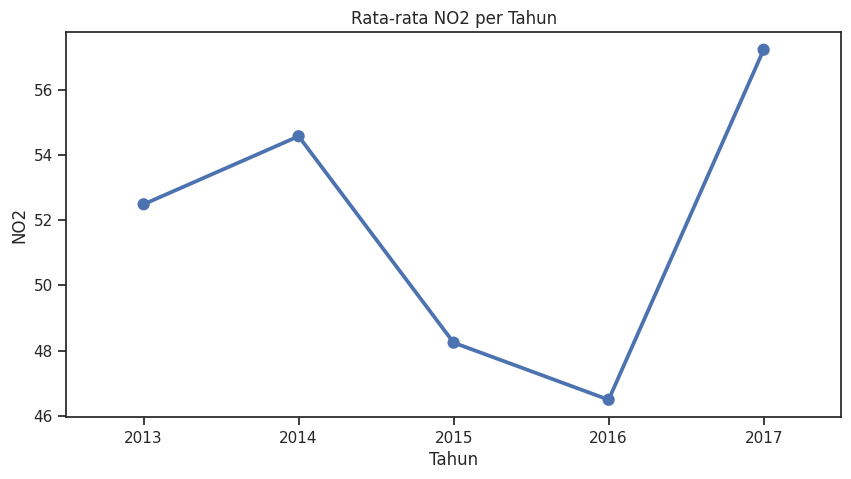

In [94]:
# Data dan pengolahan data
df = air_df[['NO2', 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)

# Membuat plot NO2
f, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(x='year', y='NO2', data=df)

# Menambahkan judul dan label sumbu
plt.title('Rata-rata NO2 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('NO2')

# Menampilkan plot
plt.show()

Berdasarkan line chart diatas polutan **NO2 tertinggi** berada pada tahun **2017**

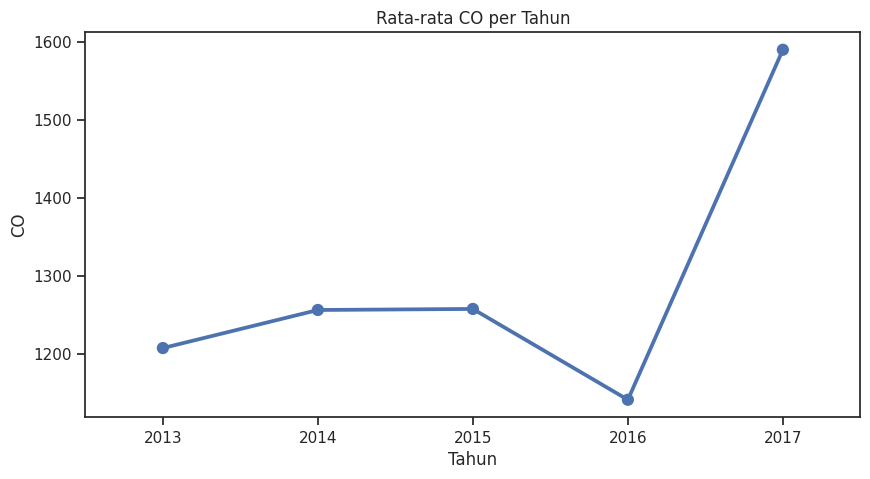

In [95]:
# Data dan pengolahan data
df = air_df[['CO', 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)

# Membuat plot CO
f, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(x='year', y='CO', data=df)

# Menambahkan judul dan label sumbu
plt.title('Rata-rata CO per Tahun')
plt.xlabel('Tahun')
plt.ylabel('CO')

# Menampilkan plot
plt.show()

Berdasarkan line chart diatas polutan **CO2 tertinggi** berada pada tahun **2017**

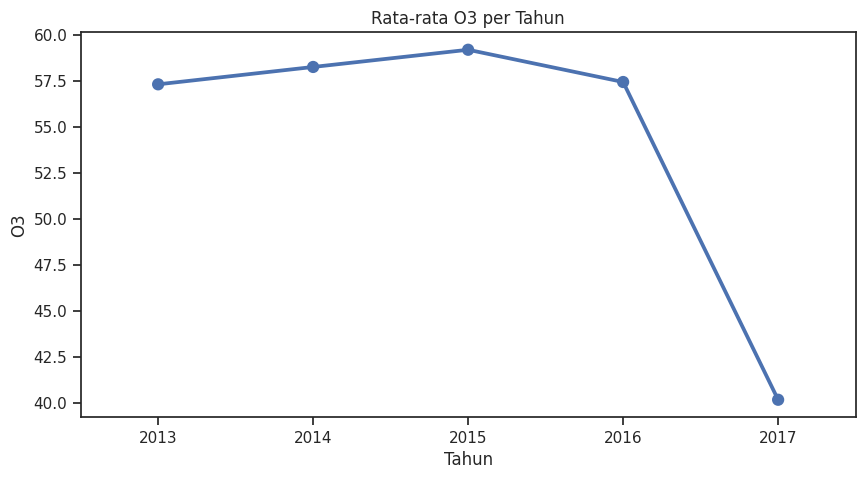

In [96]:
# Data dan pengolahan data
df = air_df[['O3', 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)

# Membuat plot O3
f, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(x='year', y='O3', data=df)

# Menambahkan judul dan label sumbu
plt.title('Rata-rata O3 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('O3')

# Menampilkan plot
plt.show()

Berdasarkan line chart diatas polutan **O3 tertinggi** berada pada tahun **2015**

In [97]:
air_df['datetime'] = pd.to_datetime(air_df[['year', 'month', 'day', 'hour']])
air_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,day_of_week,datetime
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,1,2013-03-01 00:00:00
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,1,2013-03-01 01:00:00
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,1,2013-03-01 02:00:00
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,1,2013-03-01 03:00:00
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,1,2013-03-01 04:00:00


# **Conclusion**
Station air quality during 2013-2017 based on PM2 pollutant parameters.



**1. Station air quality during 2013-2017 based on PM2.5 pollutant parameters?**
Dongsi station is the station with the highest PM2.5 composition among other stations. Air quality is categorized as Unhealthy. Other stations are also categorized as Unhealthy, only differing in the composition of PM2.5 pollutants

**2. How is the air quality during certain time periods (daily), (monthly), and (annual)?**
During daily, monthly and annual periods, CO is the air pollutant with the highest composition. Highest in 2017

**3. What is the information about air pollutants in 2013-2017?**

* Highest PM2.5 in 2017
* Highest PM10 in 2014
* Highest SO2 in 2014
* Highest NO2 in 2017
* Highest CO in 2017
* Highest O3 in 2015

2017 was an unhealthy year in terms of the composition of PM2.5 pollutants based on AQI

The correlation between TEMP, PRES, DEWP, RAIN, and WSPM with air pollutants is not very strong, there is only one that is decent, namely **TEMP** with **O3** with a correlation value of **0.59**

In [98]:
#eksport data air_df
air_df.to_csv("air_quality.csv", index=False)